# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# 3 observables from WeatherPy data set:
# 1) temperature is higher at the equator
# 2) Humidity fluxates less around the equator. The graph of humidity vs latitude shows that there are areas at higher and lower latitudes that have much larger distribution of humidities (10%-100%) while around the equator the range is only (60%-100%)
# 3) The opposite could be said for wind speed and latitude. It seems like the closer to the equator you get the larger the range of windspeed between cities compared to cities at higher or lower latitudes.

In [3]:
# Dependencies and Setup
import json
import os
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import csv

# Import API key
import config
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs, cities, and define temperature units
cities = []
lat_ngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [5]:
# URL for Current Weather Data API Call

# save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
params = {'units': 'imperial',
          'appid': weather_api_key,
          'q': ''}

In [7]:
# Empty Lists to append API data to
city_name = []
temp = []
lat = []
lon = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Initialize a counter for the number of API calls
counter = 1

print(f"Beginning Data Retrieval")
print(f"--------------------------------")

#Loop through the cities in the cities_list 
for city in cities:
    try: 
        params['q'] = city
        response = requests.get(url, params=params).json()
        
        #start appending data to lists
        city_name.append(response["name"])
        temp.append(response["main"]["temp"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_counter = response["name"]
        
        # Increase counter by one 
        print(f"Processing Record {counter} | {city_counter}")
        print(f"{url}&q={city}")
        
        #increase counter by 1
        counter += 1
        
        
    #if no data for city, skip
    except KeyError:
        print(f"{city} not found: Skipping")
        
print("--------------------------------")
print(f"Weather data found for {len(cities)} cities.")

Beginning Data Retrieval
--------------------------------
Processing Record 1 | Albany
http://api.openweathermap.org/data/2.5/weather?&q=albany
Processing Record 2 | Bara
http://api.openweathermap.org/data/2.5/weather?&q=bara
Processing Record 3 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?&q=arraial do cabo
Processing Record 4 | Nouakchott
http://api.openweathermap.org/data/2.5/weather?&q=nouakchott
Processing Record 5 | Scarborough
http://api.openweathermap.org/data/2.5/weather?&q=scarborough
Processing Record 6 | Inta
http://api.openweathermap.org/data/2.5/weather?&q=inta
Processing Record 7 | Coruripe
http://api.openweathermap.org/data/2.5/weather?&q=coruripe
Processing Record 8 | São João da Barra
http://api.openweathermap.org/data/2.5/weather?&q=sao joao da barra
Processing Record 9 | Cape Town
http://api.openweathermap.org/data/2.5/weather?&q=cape town
Processing Record 10 | Vaini
http://api.openweathermap.org/data/2.5/weather?&q=vaini
Processing Record 11 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Export data into a .csv
weather_data = pd.DataFrame({'City': city_name, 
                             'Temperature': temp, 
                             'Latitude': lat, 
                             'Longitude': lon,
                             'Humidity': humidity, 
                             'Cloudiness': cloudiness, 
                             'Wind Speed': wind_speed,
                             'Country': country,
                             'Date': date})

# Output File (CSV)
weather_data.to_csv('../output_data/weather_data.csv', index = False)

# Display data in DataFrame
weather_data.count()

City           576
Temperature    576
Latitude       576
Longitude      576
Humidity       576
Cloudiness     576
Wind Speed     576
Country        576
Date           576
dtype: int64

In [9]:
weather_data.head()

,City,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,75.29,42.60,-73.97,92,97,4.00,US,1595219325
1,Bara,72.57,10.37,10.73,93,92,10.96,NG,1595219326
2,Arraial do Cabo,70.41,-22.97,-42.03,85,0,22.44,BR,1595219326
3,Nouakchott,78.80,18.09,-15.98,83,40,14.99,MR,1595219326
4,Scarborough,47.43,54.28,-0.40,82,0,1.99,GB,1595219326


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
weather_data.sort_values(['Humidity'], ascending = False)
#there are no cities with Humidity > 100%

,City,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed,Country,Date
396,Beira,62.60,-19.84,34.84,100,75,6.93,MZ,1595219409
298,Watsa,62.85,3.04,29.54,100,98,1.07,CD,1595219388
244,Barcelos,62.40,41.54,-8.62,100,75,2.24,PT,1595219377
216,Fortuna,54.77,40.60,-124.16,100,90,4.70,US,1595219371
245,Ancud,44.65,-41.87,-73.82,100,90,3.36,CL,1595219377
...,...,...,...,...,...,...,...,...,...
371,Dimovo,60.01,43.74,22.73,10,0,7.85,BG,1595219403
375,Dawlatabad,98.73,36.41,64.91,9,0,8.55,AF,1595219405
575,Calama,41.00,-22.47,-68.93,7,64,19.46,CL,1595219444
521,Kaeo,62.01,-35.10,173.78,3,70,3.00,NZ,1595219434


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

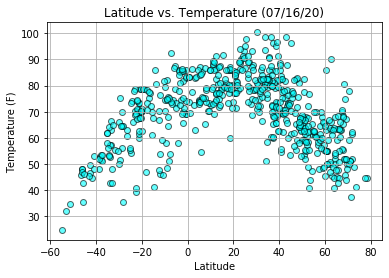

In [11]:
plt.scatter(weather_data['Latitude'], weather_data['Temperature'], marker = 'o', facecolors='aqua', alpha = 0.6, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Latitude vs. Temperature (07/16/20)')
plt.grid(True)
plt.savefig('Images/latvstemp-scatter.png')
plt.show()

In [ ]:
# this plot is showing that as you get closer to the equator (latitude = 0) the temperature increases

## Latitude vs. Humidity Plot

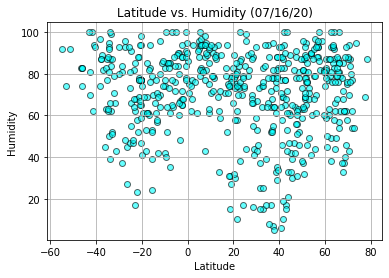

In [95]:
plt.scatter(weather_data['Latitude'], weather_data['Humidity'], marker = 'o', facecolors='aqua', alpha = 0.6, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity (07/16/20)')
plt.grid(True)
plt.savefig('Images/latvshum-scatter.png')
plt.show()

In [ ]:
# this plot is showing that humidity doesn't really depend on latitude

## Latitude vs. Cloudiness Plot

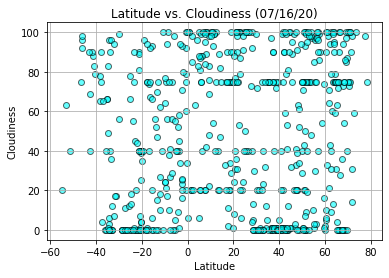

In [72]:
plt.scatter(weather_data['Latitude'], weather_data['Cloudiness'], marker = 'o', facecolors='aqua', alpha = 0.6, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness (07/16/20)')
plt.grid(True)
plt.savefig('Images/latvscloud-scatter.png')
plt.show()

In [ ]:
# this graph is demonstrating that cloudiness does not really depend on latitude..  But it does seem liek there is a little more clouds at higher latitudes (the uper right quadrant of the graph).

## Latitude vs. Wind Speed Plot

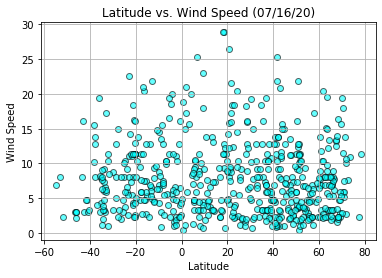

In [73]:
plt.scatter(weather_data['Latitude'], weather_data['Wind Speed'], marker = 'o', facecolors='aqua', alpha = 0.6, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed (07/16/20)')
plt.grid(True)
plt.savefig('Images/latvswind-scatter.png')
plt.show()

In [ ]:
# this graph shows the relaltionship between wind speed and latitude and it kind of looks like wind speed does not depend on latitude

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem = weather_data.loc[weather_data["Latitude"] >= 0.0]
northern_hem.reset_index

southern_hem = weather_data.loc[weather_data["Latitude"] < 0.0]
southern_hem.reset_index
northern_hem

,City,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,75.29,42.60,-73.97,92,97,4.00,US,1595219325
1,Bara,72.57,10.37,10.73,93,92,10.96,NG,1595219326
3,Nouakchott,78.80,18.09,-15.98,83,40,14.99,MR,1595219326
4,Scarborough,47.43,54.28,-0.40,82,0,1.99,GB,1595219326
5,Inta,63.50,66.03,60.17,56,2,6.69,RU,1595219326
...,...,...,...,...,...,...,...,...,...
569,Tabas,98.60,33.60,56.92,11,0,2.24,IR,1595219443
570,Port Hardy,62.60,50.70,-127.42,72,20,5.82,CA,1595219443
572,Abbeyleix,40.87,52.90,-7.36,94,0,2.19,IE,1595219443
573,Harlingen,79.88,26.19,-97.70,83,1,6.93,US,1595219444


In [13]:
southern_hem

,City,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed,Country,Date
2,Arraial do Cabo,70.41,-22.97,-42.03,85,0,22.44,BR,1595219326
6,Coruripe,74.48,-10.13,-36.18,84,51,15.39,BR,1595219326
7,São João da Barra,70.72,-21.64,-41.05,87,49,10.60,BR,1595219327
8,Cape Town,52.66,-33.93,18.42,100,0,1.12,ZA,1595219327
9,Vaini,69.80,-21.20,-175.20,100,90,9.17,TO,1595219040
...,...,...,...,...,...,...,...,...,...
555,Emerald,78.03,-23.53,148.17,26,88,5.82,AU,1595219440
560,Kendari,84.09,-3.94,122.50,66,22,7.25,ID,1595219441
564,Santa Maria,75.20,-29.68,-53.81,60,17,9.17,BR,1595219364
571,Saldanha,42.80,-33.01,17.94,93,0,2.24,ZA,1595219443


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

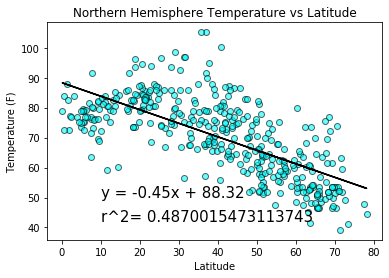

In [87]:
x = northern_hem['Latitude']
y = northern_hem['Temperature']
plt.scatter(x,y, marker = 'o', facecolors='aqua', alpha = 0.6, edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = northern_hem['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_square = rvalue**2
plt.plot(x,regress_values,"black")
plt.annotate(line_eq,(10,50),fontsize = 15, color="black")
plt.annotate(f"r^2= {r_square}",(10,42),fontsize = 15, color="black")
plt.title("Northern Hemisphere Temperature vs Latitude")
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.savefig("Images/northern_temp_lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

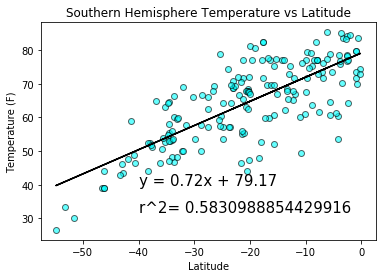

In [88]:
x = southern_hem['Latitude']
y = southern_hem['Temperature']
plt.scatter(x,y, marker = 'o', facecolors='aqua', alpha = 0.6, edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = southern_hem['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_square = rvalue**2
plt.plot(x,regress_values,"black")
plt.annotate(line_eq,(-40,40),fontsize = 15, color="black")
plt.annotate(f"r^2= {r_square_s}",(-40,32),fontsize = 15, color="black")
plt.title("Southern Hemisphere Temperature vs Latitude")
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.savefig("Images/southern_temp_lat.png")

In [ ]:
#In the Northern hemisphere there is a negative correlation between temperature and latitude which turns into a positive correlation in the southern hemisphere because the closer you get to the equator coming from both directions, it gets hotter. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

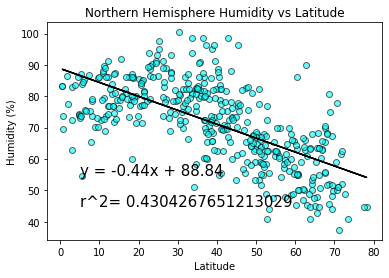

In [15]:
x = northern_hem['Latitude']
y = northern_hem['Temperature']
plt.scatter(x,y, marker = 'o', facecolors='aqua', alpha = 0.6, edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = northern_hem['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_square = rvalue**2
plt.plot(x,regress_values,"black")
plt.annotate(line_eq,(5,55),fontsize = 15, color="black")
plt.annotate(f"r^2= {r_square}",(5,45),fontsize = 15, color="black")
plt.title("Northern Hemisphere Humidity vs Latitude")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.savefig("Images/northern_temp_hum.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

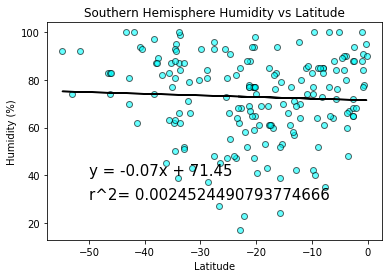

In [90]:
x = southern_hem['Latitude']
y = southern_hem['Humidity']
plt.scatter(x,y, marker = 'o', facecolors='aqua', alpha = 0.6, edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = southern_hem['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_square = rvalue**2
plt.plot(x,regress_values,"black")
plt.annotate(line_eq,(-50,40),fontsize = 15, color="black")
plt.annotate(f"r^2= {r_square}",(-50,30),fontsize = 15, color="black")
plt.title("Southern Hemisphere Humidity vs Latitude")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.savefig("Images/southern_temp_hum.png")

In [ ]:
# In the Northern hemisphere there is a negative correlation between latitude and humidity, the farther south you go, the more humid it becomes. 
# However, this correlation does not persist in the Southern hemisphere because there is much lower land mass

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

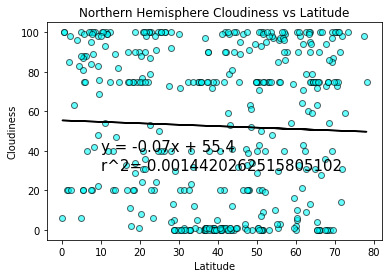

In [91]:
x = northern_hem['Latitude']
y = northern_hem['Cloudiness']
plt.scatter(x,y, marker = 'o', facecolors='aqua', alpha = 0.6, edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = northern_hem['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_square = rvalue**2
plt.plot(x,regress_values,"black")
plt.annotate(line_eq,(10,40),fontsize = 15, color="black")
plt.annotate(f"r^2= {r_square}",(10,30),fontsize = 15, color="black")
plt.title("Northern Hemisphere Cloudiness vs Latitude")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.savefig("Images/northern_temp_cloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

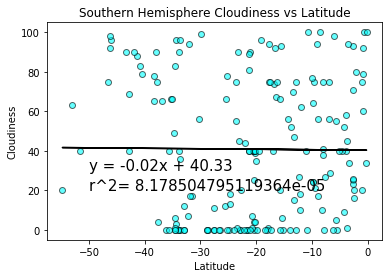

In [92]:
x = southern_hem['Latitude']
y = southern_hem['Cloudiness']
plt.scatter(x,y, marker = 'o', facecolors='aqua', alpha = 0.6, edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = southern_hem['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_square = rvalue**2
plt.plot(x,regress_values,"black")
plt.annotate(line_eq,(-50,30),fontsize = 15, color="black")
plt.annotate(f"r^2= {r_square}",(-50,20),fontsize = 15, color="black")
plt.title("Southern Hemisphere Cloudiness vs Latitude")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.savefig("Images/southern_temp_cloud.png")

In [ ]:
# There does not seem to be a correlation between latitude and cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

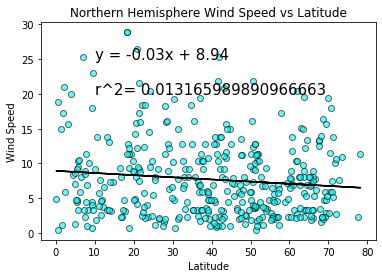

In [93]:
x = northern_hem['Latitude']
y = northern_hem['Wind Speed']
plt.scatter(x,y, marker = 'o', facecolors='aqua', alpha = 0.6, edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = northern_hem['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_square = rvalue**2
plt.plot(x,regress_values,"black")
plt.annotate(line_eq,(10,25),fontsize = 15, color="black")
plt.annotate(f"r^2= {r_square}",(10,20),fontsize = 15, color="black")
plt.title("Northern Hemisphere Wind Speed vs Latitude")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.savefig("Images/northern_temp_wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

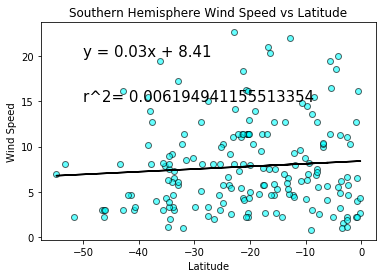

In [94]:
x = southern_hem['Latitude']
y = southern_hem['Wind Speed']
plt.scatter(x,y, marker = 'o', facecolors='aqua', alpha = 0.6, edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = southern_hem['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_square = rvalue**2
plt.plot(x,regress_values,"black")
plt.annotate(line_eq,(-50,20),fontsize = 15, color="black")
plt.annotate(f"r^2= {r_square}",(-50,15),fontsize = 15, color="black")
plt.title("Southern Hemisphere Wind Speed vs Latitude")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.savefig("Images/southern_temp_wind.png")

In [ ]:
# There does not seem to be a correlation between Latitude and Wind Speed